# Import Libraries & Dataset

In [64]:
import numpy as np
import pandas as pd
import nltk
# nltk.download()
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGraph',
 'Depen

In [65]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [66]:
df = pd.read_excel('Comments_Data_Extracts_01.xlsx')
df[0:500]

,Comments
0,I just bought this projector and i am clueless...
1,You promised me a multi card reader for leavin...
2,"Hello Apeman, your team is not responding to m..."
3,"Great picture, I am so excited about looking f..."
4,I have just bought the Apeman 550 dashcam and ...
...,...
495,Want a reprieve from all the bad news on twitt...
496,@Apple @AppleSupport #applecarplay update is t...
497,@Apple @AppleSupport #applecarplay update is t...
498,@Apple @AppleSupport #applecarplay update is t...


# Data Undrstanding & Explore

In [67]:
df.head()
df.tail()

,Comments
0,I just bought this projector and i am clueless...
1,You promised me a multi card reader for leavin...
2,"Hello Apeman, your team is not responding to m..."
3,"Great picture, I am so excited about looking f..."
4,I have just bought the Apeman 550 dashcam and ...


,Comments
9541,Did You see it? 🙈https://t.co/X1b3ZyrGbeLet th...
9542,4inch FHD 1080P DVR camera RecorderWhatsApp/We...
9543,📷 4inch FHD 1080P DVR camera Recorder WhatsApp...
9544,#autobrighttech #AutobrightTech #caraccessorie...
9545,📷 #autobrighttech #AutobrightTech #caraccessor...


In [68]:
print(f'Inpute data has {len(df)} rows, {len(df.columns)} columns')

Inpute data has 9546 rows, 1 columns


In [69]:
print(f"Numbers of missing label = {df['Comments'].isnull().sum()}")

Numbers of missing label = 0


In [70]:
# Spell correct using text blob
#from textblob import TextBlob
#df = df['Comments'].apply(lambda x: str(TextBlob(x).correct()))

In [71]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [73]:
df['msg_clean'] = df['Comments'].apply(lambda x: remove_punctuation(x))
df.head()
df.tail()

,Comments,msg_clean
0,I just bought this projector and i am clueless...,I just bought this projector and i am clueless...
1,You promised me a multi card reader for leavin...,You promised me a multi card reader for leavin...
2,"Hello Apeman, your team is not responding to m...",Hello Apeman your team is not responding to my...
3,"Great picture, I am so excited about looking f...",Great picture I am so excited about looking fo...
4,I have just bought the Apeman 550 dashcam and ...,I have just bought the Apeman 550 dashcam and ...


,Comments,msg_clean
9541,Did You see it? 🙈https://t.co/X1b3ZyrGbeLet th...,Did You see it 🙈httpstcoX1b3ZyrGbeLet the fun ...
9542,4inch FHD 1080P DVR camera RecorderWhatsApp/We...,4inch FHD 1080P DVR camera RecorderWhatsAppWeC...
9543,📷 4inch FHD 1080P DVR camera Recorder WhatsApp...,📷 4inch FHD 1080P DVR camera Recorder WhatsApp...
9544,#autobrighttech #AutobrightTech #caraccessorie...,autobrighttech AutobrightTech caraccessories a...
9545,📷 #autobrighttech #AutobrightTech #caraccessor...,📷 autobrighttech AutobrightTech caraccessories...


# Tokenization

In [74]:
import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens


df['msg_clean_tokenized'] = df['msg_clean'].apply(lambda x: tokenize(x.lower()))

df.head()
df.tail()

,Comments,msg_clean,msg_clean_tokenized
0,I just bought this projector and i am clueless...,I just bought this projector and i am clueless...,"[i, just, bought, this, projector, and, i, am,..."
1,You promised me a multi card reader for leavin...,You promised me a multi card reader for leavin...,"[you, promised, me, a, multi, card, reader, fo..."
2,"Hello Apeman, your team is not responding to m...",Hello Apeman your team is not responding to my...,"[hello, apeman, your, team, is, not, respondin..."
3,"Great picture, I am so excited about looking f...",Great picture I am so excited about looking fo...,"[great, picture, i, am, so, excited, about, lo..."
4,I have just bought the Apeman 550 dashcam and ...,I have just bought the Apeman 550 dashcam and ...,"[i, have, just, bought, the, apeman, 550, dash..."


,Comments,msg_clean,msg_clean_tokenized
9541,Did You see it? 🙈https://t.co/X1b3ZyrGbeLet th...,Did You see it 🙈httpstcoX1b3ZyrGbeLet the fun ...,"[did, you, see, it, httpstcox1b3zyrgbelet, the..."
9542,4inch FHD 1080P DVR camera RecorderWhatsApp/We...,4inch FHD 1080P DVR camera RecorderWhatsAppWeC...,"[4inch, fhd, 1080p, dvr, camera, recorderwhats..."
9543,📷 4inch FHD 1080P DVR camera Recorder WhatsApp...,📷 4inch FHD 1080P DVR camera Recorder WhatsApp...,"[, 4inch, fhd, 1080p, dvr, camera, recorder, w..."
9544,#autobrighttech #AutobrightTech #caraccessorie...,autobrighttech AutobrightTech caraccessories a...,"[autobrighttech, autobrighttech, caraccessorie..."
9545,📷 #autobrighttech #AutobrightTech #caraccessor...,📷 autobrighttech AutobrightTech caraccessories...,"[, autobrighttech, autobrighttech, caraccessor..."


# Remove Stop Words

In [75]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [76]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

df['msg_no_sw'] = df['msg_clean_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()
df.tail()

,Comments,msg_clean,msg_clean_tokenized,msg_no_sw
0,I just bought this projector and i am clueless...,I just bought this projector and i am clueless...,"[i, just, bought, this, projector, and, i, am,...","[bought, projector, clueless, connect, iphone, ]"
1,You promised me a multi card reader for leavin...,You promised me a multi card reader for leavin...,"[you, promised, me, a, multi, card, reader, fo...","[promised, multi, card, reader, leaving, revie..."
2,"Hello Apeman, your team is not responding to m...",Hello Apeman your team is not responding to my...,"[hello, apeman, your, team, is, not, respondin...","[hello, apeman, team, responding, email, fixin..."
3,"Great picture, I am so excited about looking f...",Great picture I am so excited about looking fo...,"[great, picture, i, am, so, excited, about, lo...","[great, picture, excited, looking, 4k, cameraj..."
4,I have just bought the Apeman 550 dashcam and ...,I have just bought the Apeman 550 dashcam and ...,"[i, have, just, bought, the, apeman, 550, dash...","[bought, apeman, 550, dashcam, find, rear, cam..."


,Comments,msg_clean,msg_clean_tokenized,msg_no_sw
9541,Did You see it? 🙈https://t.co/X1b3ZyrGbeLet th...,Did You see it 🙈httpstcoX1b3ZyrGbeLet the fun ...,"[did, you, see, it, httpstcox1b3zyrgbelet, the...","[see, httpstcox1b3zyrgbelet, fun, begin, xboxn..."
9542,4inch FHD 1080P DVR camera RecorderWhatsApp/We...,4inch FHD 1080P DVR camera RecorderWhatsAppWeC...,"[4inch, fhd, 1080p, dvr, camera, recorderwhats...","[4inch, fhd, 1080p, dvr, camera, recorderwhats..."
9543,📷 4inch FHD 1080P DVR camera Recorder WhatsApp...,📷 4inch FHD 1080P DVR camera Recorder WhatsApp...,"[, 4inch, fhd, 1080p, dvr, camera, recorder, w...","[, 4inch, fhd, 1080p, dvr, camera, recorder, w..."
9544,#autobrighttech #AutobrightTech #caraccessorie...,autobrighttech AutobrightTech caraccessories a...,"[autobrighttech, autobrighttech, caraccessorie...","[autobrighttech, autobrighttech, caraccessorie..."
9545,📷 #autobrighttech #AutobrightTech #caraccessor...,📷 autobrighttech AutobrightTech caraccessories...,"[, autobrighttech, autobrighttech, caraccessor...","[, autobrighttech, autobrighttech, caraccessor..."


# Stemming and Lemmatization

In [77]:
df['msg_stemmed'] = df['msg_no_sw'].apply(lambda x: stemming(x))
df.head()
df.tail()

,Comments,msg_clean,msg_clean_tokenized,msg_no_sw,msg_stemmed
0,I just bought this projector and i am clueless...,I just bought this projector and i am clueless...,"[i, just, bought, this, projector, and, i, am,...","[bought, projector, clueless, connect, iphone, ]","[bought, projector, clueless, connect, iphon, ]"
1,You promised me a multi card reader for leavin...,You promised me a multi card reader for leavin...,"[you, promised, me, a, multi, card, reader, fo...","[promised, multi, card, reader, leaving, revie...","[promis, multi, card, reader, leav, review, im..."
2,"Hello Apeman, your team is not responding to m...",Hello Apeman your team is not responding to my...,"[hello, apeman, your, team, is, not, respondin...","[hello, apeman, team, responding, email, fixin...","[hello, apeman, team, respond, email, fix, iss..."
3,"Great picture, I am so excited about looking f...",Great picture I am so excited about looking fo...,"[great, picture, i, am, so, excited, about, lo...","[great, picture, excited, looking, 4k, cameraj...","[great, pictur, excit, look, 4k, camerajust, n..."
4,I have just bought the Apeman 550 dashcam and ...,I have just bought the Apeman 550 dashcam and ...,"[i, have, just, bought, the, apeman, 550, dash...","[bought, apeman, 550, dashcam, find, rear, cam...","[bought, apeman, 550, dashcam, find, rear, cam..."


,Comments,msg_clean,msg_clean_tokenized,msg_no_sw,msg_stemmed
9541,Did You see it? 🙈https://t.co/X1b3ZyrGbeLet th...,Did You see it 🙈httpstcoX1b3ZyrGbeLet the fun ...,"[did, you, see, it, httpstcox1b3zyrgbelet, the...","[see, httpstcox1b3zyrgbelet, fun, begin, xboxn...","[see, httpstcox1b3zyrgbelet, fun, begin, xboxn..."
9542,4inch FHD 1080P DVR camera RecorderWhatsApp/We...,4inch FHD 1080P DVR camera RecorderWhatsAppWeC...,"[4inch, fhd, 1080p, dvr, camera, recorderwhats...","[4inch, fhd, 1080p, dvr, camera, recorderwhats...","[4inch, fhd, 1080p, dvr, camera, recorderwhats..."
9543,📷 4inch FHD 1080P DVR camera Recorder WhatsApp...,📷 4inch FHD 1080P DVR camera Recorder WhatsApp...,"[, 4inch, fhd, 1080p, dvr, camera, recorder, w...","[, 4inch, fhd, 1080p, dvr, camera, recorder, w...","[, 4inch, fhd, 1080p, dvr, camera, record, wha..."
9544,#autobrighttech #AutobrightTech #caraccessorie...,autobrighttech AutobrightTech caraccessories a...,"[autobrighttech, autobrighttech, caraccessorie...","[autobrighttech, autobrighttech, caraccessorie...","[autobrighttech, autobrighttech, caraccessori,..."
9545,📷 #autobrighttech #AutobrightTech #caraccessor...,📷 autobrighttech AutobrightTech caraccessories...,"[, autobrighttech, autobrighttech, caraccessor...","[, autobrighttech, autobrighttech, caraccessor...","[, autobrighttech, autobrighttech, caraccessor..."


In [78]:
# WordNet lexical database for lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

print(wordnet_lemmatizer.lemmatize('goose'))
print(wordnet_lemmatizer.lemmatize('geese'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

goose
goose


In [79]:
def lemmatization(token_txt):
    text = [wordnet_lemmatizer.lemmatize(word) for word in token_txt]
    return text

In [80]:
df['msg_lemmatized'] = df['msg_no_sw'].apply(lambda x : lemmatization(x))
df.head()

,Comments,msg_clean,msg_clean_tokenized,msg_no_sw,msg_stemmed,msg_lemmatized
0,I just bought this projector and i am clueless...,I just bought this projector and i am clueless...,"[i, just, bought, this, projector, and, i, am,...","[bought, projector, clueless, connect, iphone, ]","[bought, projector, clueless, connect, iphon, ]","[bought, projector, clueless, connect, iphone, ]"
1,You promised me a multi card reader for leavin...,You promised me a multi card reader for leavin...,"[you, promised, me, a, multi, card, reader, fo...","[promised, multi, card, reader, leaving, revie...","[promis, multi, card, reader, leav, review, im...","[promised, multi, card, reader, leaving, revie..."
2,"Hello Apeman, your team is not responding to m...",Hello Apeman your team is not responding to my...,"[hello, apeman, your, team, is, not, respondin...","[hello, apeman, team, responding, email, fixin...","[hello, apeman, team, respond, email, fix, iss...","[hello, apeman, team, responding, email, fixin..."
3,"Great picture, I am so excited about looking f...",Great picture I am so excited about looking fo...,"[great, picture, i, am, so, excited, about, lo...","[great, picture, excited, looking, 4k, cameraj...","[great, pictur, excit, look, 4k, camerajust, n...","[great, picture, excited, looking, 4k, cameraj..."
4,I have just bought the Apeman 550 dashcam and ...,I have just bought the Apeman 550 dashcam and ...,"[i, have, just, bought, the, apeman, 550, dash...","[bought, apeman, 550, dashcam, find, rear, cam...","[bought, apeman, 550, dashcam, find, rear, cam...","[bought, apeman, 550, dashcam, find, rear, cam..."


In [81]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# dir(porter_stemmer)

In [82]:
def stemming(tokenized_text):
    text = [porter_stemmer.stem(word) for word in tokenized_text]
    return text

In [83]:
from nltk import word_tokenize, FreqDist
nltk.download('punkt')
tokens = word_tokenize(df['msg_lemmatized'].to_string())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
len(tokens)

131422

In [85]:
len(set(tokens))

21536

# Frequency Distribution

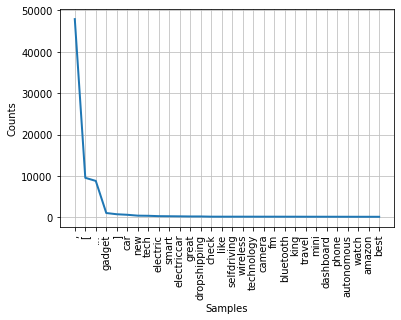

In [86]:
fd = nltk.FreqDist(tokens)
fd.plot(30)

In [ ]:
### References: 
### https://www.kaggle.com/sanikamal/nlp-with-python-and-nltk
### https://www.kaggle.com/neokaixiang89/using-pos-tag-to-aid-textual-data-pre-processing